### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

2023-02-19 13:35:14.991276: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-19 13:35:16.135032: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-19 13:35:16.135925: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-19 13:35:21.173482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-19 13:35:21.173515: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-19 13:35:21.175346: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-02-19

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**

- The first dimension is the amount of samples
- The second and third dimension are the pixels of the samples
- The fourth dimension contains the r, g and b values for the pixels

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

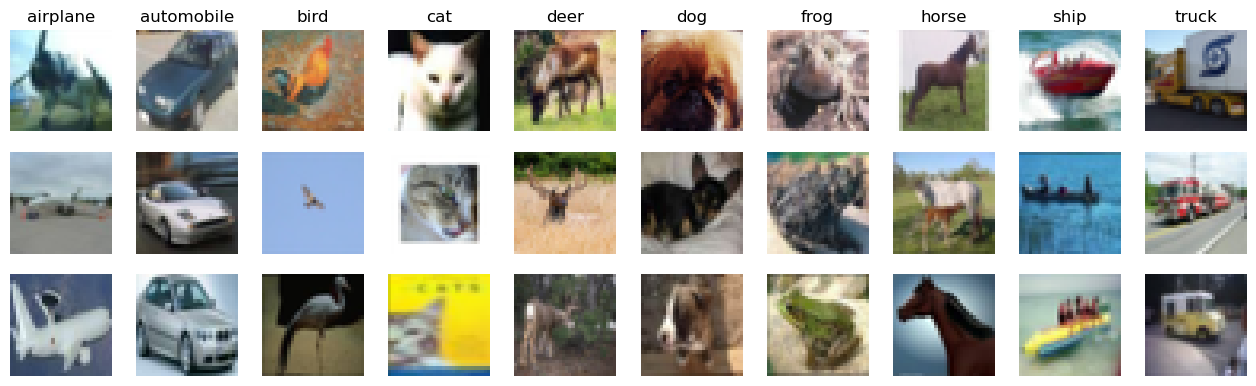

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten (Flatten)                            (None, 3072)                            0              
____________________________________________________________________________________________________
dense (Dense)                                (None, 512)                             1573376        
____________________________________________________________________________________________________
dense_1 (Dense)                              (None, 256)                             131328         
____________________________________________________________________________

2023-02-19 13:35:23.933303: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 13:35:23.933622: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-19 13:35:23.934460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-19 13:35:23.934490: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-19 13:35:23.934520: I tensorflow/stream_executor/platform/default/dso_loa

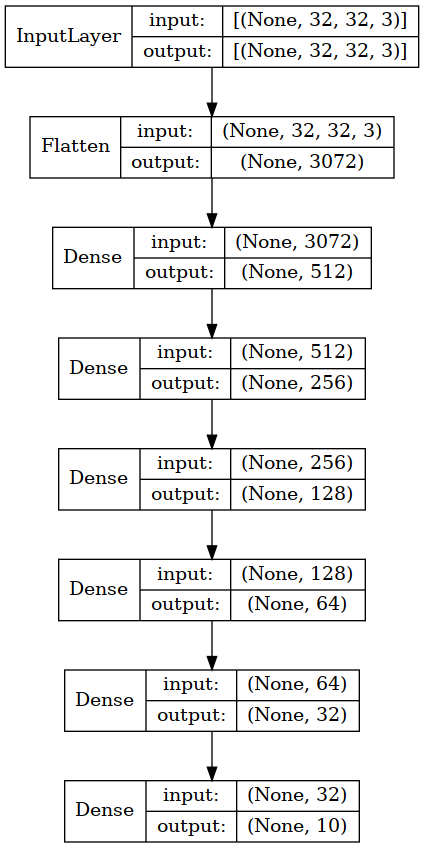

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [6]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

2023-02-19 13:35:25.215352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-19 13:35:25.215828: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2596985000 Hz


Epoch 1/15
  17/1250 [..............................] - ETA: 4s - loss: 2.3047 - accuracy: 0.1136   

2023-02-19 13:35:25.610224: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1250/1250 [==============================] - 6s 4ms/step - loss: 1.9806 - accuracy: 0.2627 - val_loss: 1.7646 - val_accuracy: 0.3671
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7327 - accuracy: 0.3797 - val_loss: 1.7106 - val_accuracy: 0.3858
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6440 - accuracy: 0.4091 - val_loss: 1.6131 - val_accuracy: 0.4203
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5920 - accuracy: 0.4294 - val_loss: 1.7113 - val_accuracy: 0.3899
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5388 - accuracy: 0.4447 - val_loss: 1.5885 - val_accuracy: 0.4329
Epoch 6/15
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5075 - accuracy: 0.4598 - val_loss: 1.5622 - val_accuracy: 0.4525
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4769 - accuracy: 0.4688 - val_loss: 1.5398 - val_accuracy: 0.4586
Epo

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [7]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.439
Test accuracy = 0.489


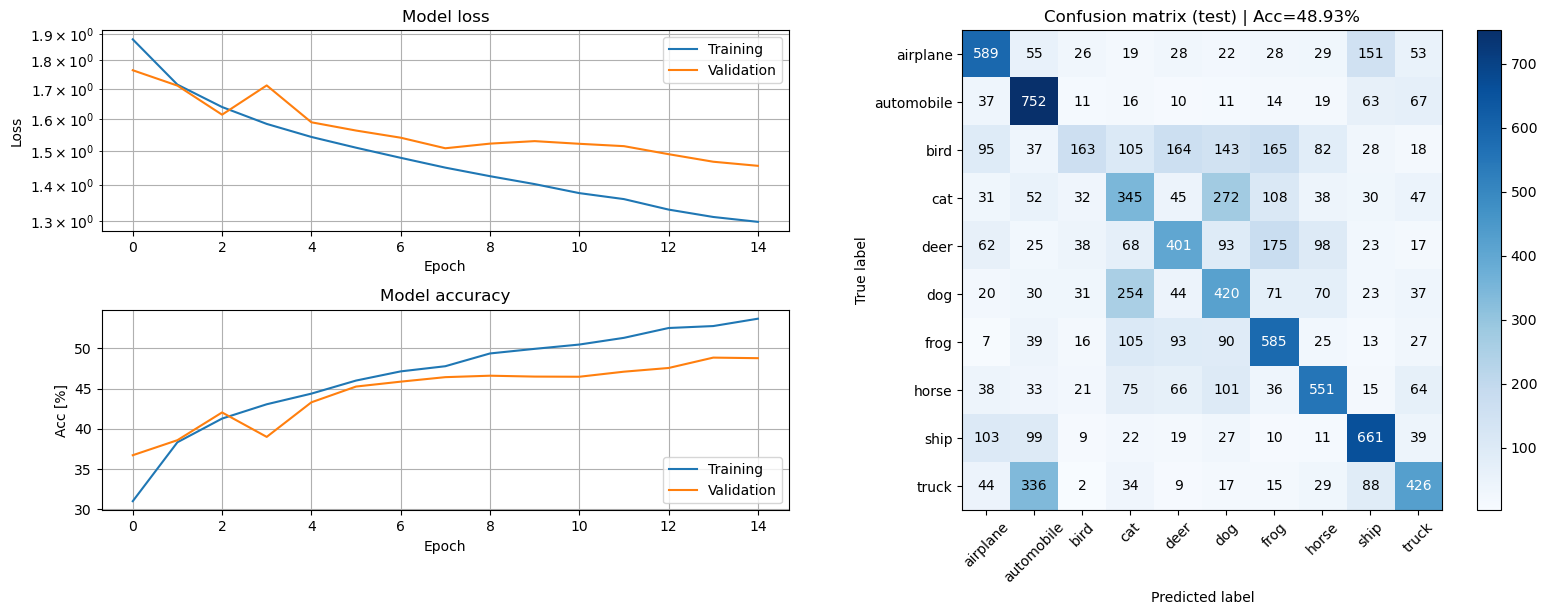

In [8]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**

#### Architecture
- The model contains 5 fully-connected (dense) hidden layers with $2^{10-l}$ neurons on each layer $l \in \{1, \dots, 5\}$. 
  All hidden layers use the ReLU activation function.
- The output layer is fully-connected to layer $l=5$ and contains 10 outputs neurons and uses softmax to get valid class probabilities.
- I chose this architecture, because the input is of a very high dimension (3072) which we want to categorize into 10 classes.
- The idea is to "filter" out important features by halving the neuron count on each layer.
- The first layer has the highest dimension, as we don't want to miss important features on the first layer already.

#### Results
- The model achieves a test accuracy of around 47-49% which is okay considering it isn't a CNN.
- The model doesn't seem to overfit by too much, but has some plateauing iterations (6-12), after which some gains are made again.
- The model would probably overfit given more epochs.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**

- Higher dimensional input (colored and more pixels) means that images of the same class are less likely to be similar (curse of dimensionality).
- Additionally, the digits were always centered in the MNIST data set and had the same size. In this dataset, the objects may not be in the center and have varying sizes.
- This makes the relationship of inputs to classes more complex.
- More complex relationships require more complex models (more parameters) which take longer to train.
- Since we are not using convolutions, we are not utilizing the locality and shift invariance properties of images.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_2 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                            (None, 32, 32, 16)                      448            
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)               (None, 16, 16, 16)                      0              
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                            (None, 16, 16, 32)                      4640           
__________________________________________________________________________

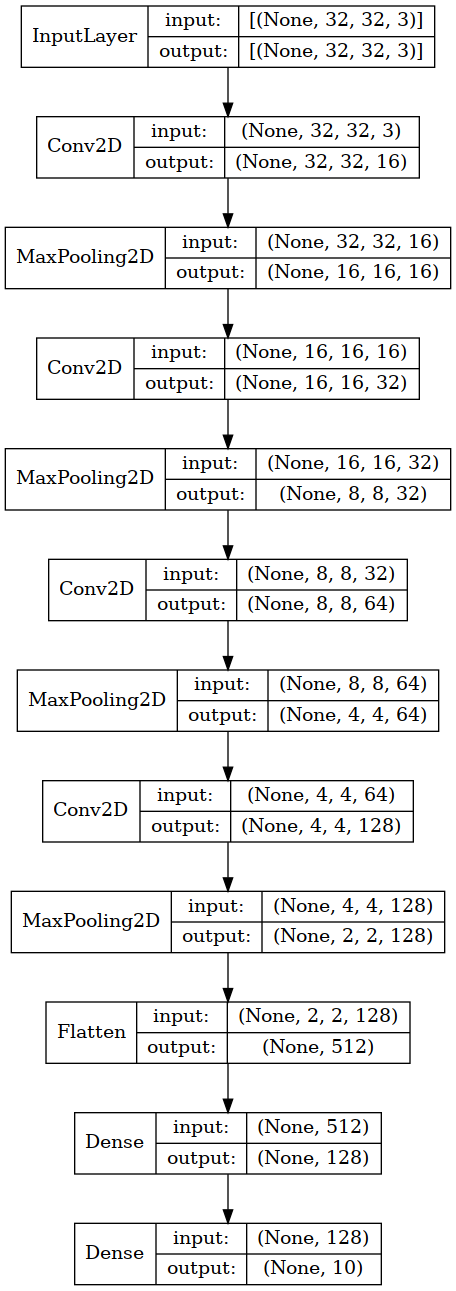

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D()(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D()(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

##### **Training the CNN**

In [10]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15


2023-02-19 13:36:38.112860: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-02-19 13:36:38.569475: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-02-19 13:36:38.593260: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1250/1250 [==============================] - 12s 6ms/step - loss: 1.9354 - accuracy: 0.2843 - val_loss: 1.3872 - val_accuracy: 0.5014
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3260 - accuracy: 0.5201 - val_loss: 1.2295 - val_accuracy: 0.5616
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1231 - accuracy: 0.6024 - val_loss: 1.1354 - val_accuracy: 0.6037
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9748 - accuracy: 0.6526 - val_loss: 0.9747 - val_accuracy: 0.6575
Epoch 5/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8621 - accuracy: 0.6937 - val_loss: 0.9892 - val_accuracy: 0.6628
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7680 - accuracy: 0.7302 - val_loss: 0.9749 - val_accuracy: 0.6679
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7063 - accuracy: 0.7481 - val_loss: 0.9680 - val_accuracy: 0.6722
Ep

##### **Evaluating the CNN**

In [11]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.174
Test accuracy = 0.660


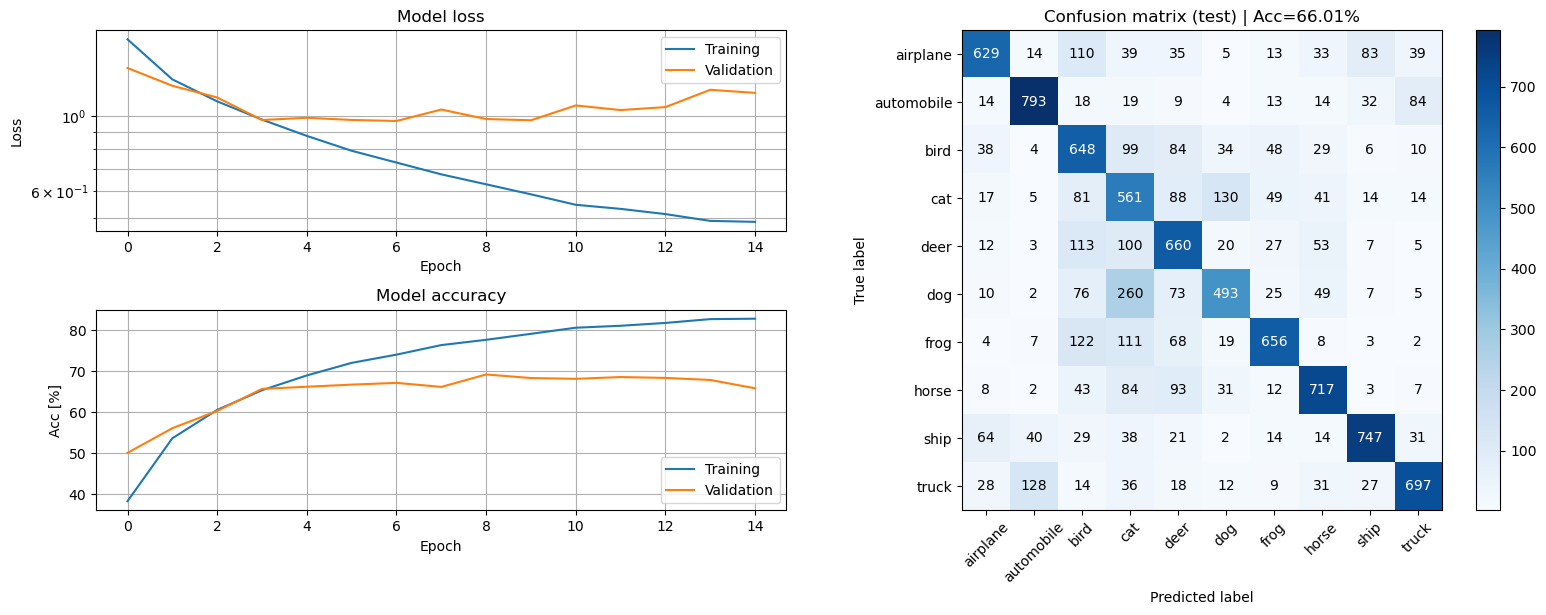

In [12]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**

#### Architecture
- The model contains 5 convolution->activation->pooling blocks with $2^{i+2}$ filters for each convolution $l \in \{1, \dots, 5\}$.
- The kernel is of shape (3, 3) and moves in shape (1, 1).
- After each convolution the output of every filter is activated using ReLU and then pooled using max pooling with shape (2,2).
- After the 5 convolution->activation->pooling blocks the last pooled block is flattend and connected to a dense layer with 128 neurons (also activated using ReLU).
- The output layer is fully-connected to the dense layer and contains 10 outputs neurons which are activated using softmax.
- I chose this architecture, because the input is of a high dimension which we want to categorize into 10 classes.
- The idea is to "filter" out important features by halving the neuron count on each layer.
- The first layer has the highest filter count, as we don't want to miss important features on the first layer already.
- The approach is exactly the same as in the previous dense-model, which was inspired by the CNN approach.

#### Results
- The model achieves a test accuracy of around 66% which is better than the dense-model, since we are now actually using convolution layers to filter out important features.
- The model textbook overfits starting at the 6th epoch by losing some validation accuracy.
- The training accuracy is way, way higher at around 85% which suggests that this architecture will do very well when regularization is applied.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**

- The dense-network had have and learn parameters for the objects at different positions and sizes in the image.
- By using Filters (kernels) in the CNN, the network is learning weights for specific features extracted from the image (e.g. one feature of cats might be their eyes) in the dense layer

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

Model: "model_2"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_3 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_6 (Conv2D)                            (None, 32, 32, 16)                      448            
____________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)               (None, 16, 16, 16)                      0              
____________________________________________________________________________________________________
dropout_1 (Dropout)                          (None, 16, 16, 16)                      0              
__________________________________________________________________________

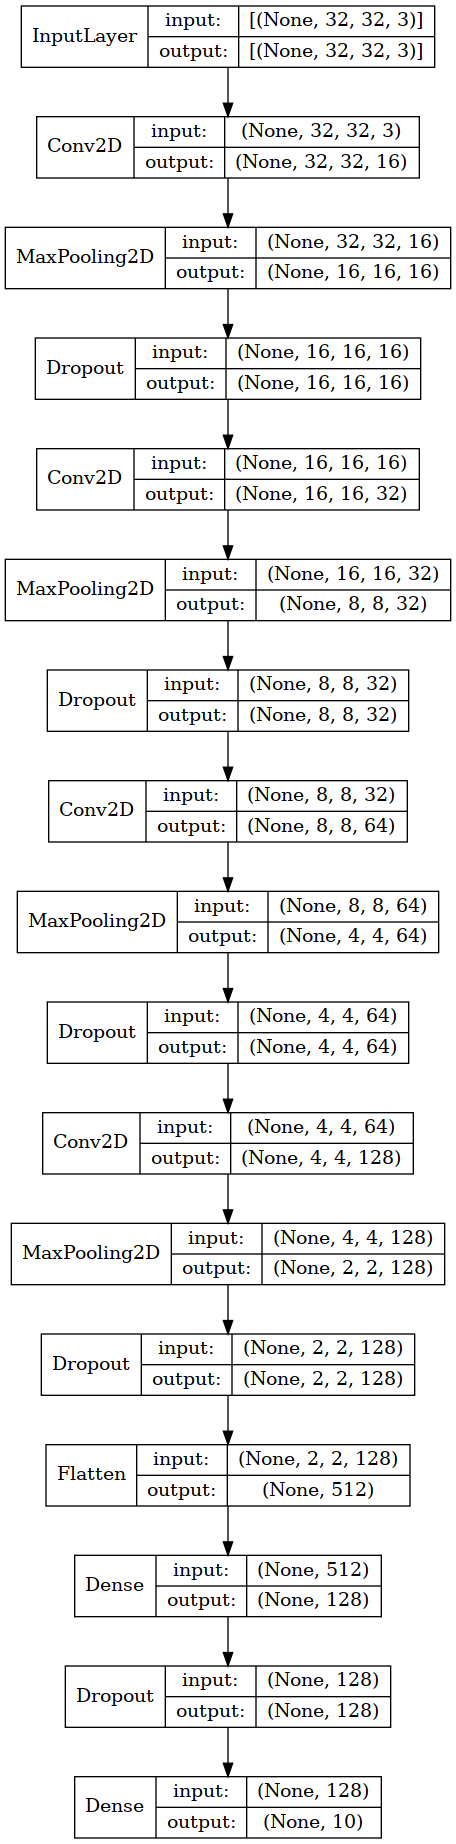

In [13]:
from tensorflow.keras.layers import Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

rate = 0.1

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x_in)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate)(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [14]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 7s 5ms/step - loss: 2.0031 - accuracy: 0.2522 - val_loss: 1.4319 - val_accuracy: 0.4614
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4294 - accuracy: 0.4784 - val_loss: 1.2099 - val_accuracy: 0.5619
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2332 - accuracy: 0.5570 - val_loss: 1.1257 - val_accuracy: 0.6054
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1226 - accuracy: 0.6011 - val_loss: 1.0410 - val_accuracy: 0.6318
Epoch 5/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0480 - accuracy: 0.6240 - val_loss: 0.9927 - val_accuracy: 0.6495
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9810 - accuracy: 0.6524 - val_loss: 0.9169 - val_accuracy: 0.6751
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9295 - accuracy: 0.6744 - val_loss: 0.9023 - val_accuracy:

In [15]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.846
Test accuracy = 0.714


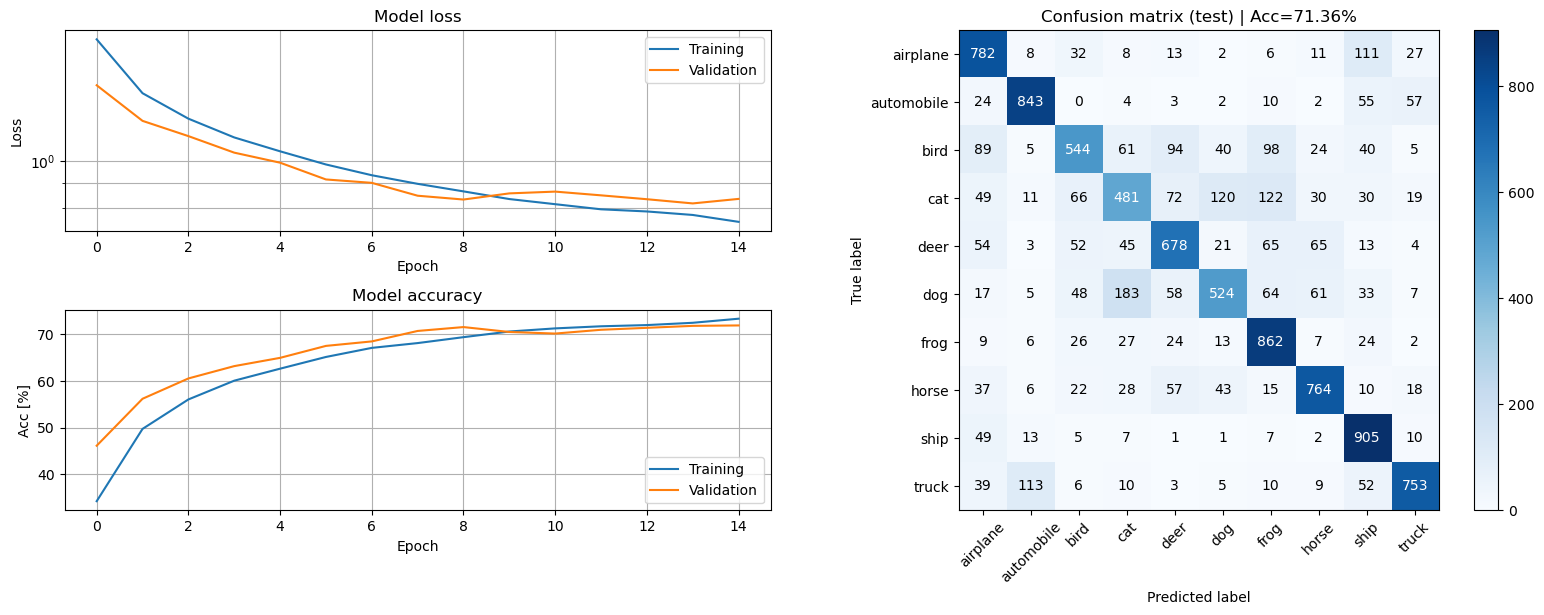

In [16]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**

- The dropout model achieves a higher test accuracy of 71% versus 66% for the non dropout model.
- The dropout model achieves a training accuracy 74%, which is lower than the 85% of the model without dropout.
- Model without dropout begins to overfit quickly (after 6 epochs). Model with dropout doesn't overfit during the 15 epochs. This suggests that training the dropout model for more iterations could still yield significant accuracy gains.
- The training and validation accuracy stay largely in sync for the dropout model.
- The test error of the dropout model is sursprisingly close to the validation error of the last epoch. I would've expected the test error to be worse, since dropout is turned off during model application (in our case testing), which means that the neurons of the layers after the dropout are not trained to the higher amount of inputs.

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

Model: "model_3"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_4 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_10 (Conv2D)                           (None, 32, 32, 8)                       224            
____________________________________________________________________________________________________
batch_normalization (BatchNormalization)     (None, 32, 32, 8)                       32             
____________________________________________________________________________________________________
activation (Activation)                      (None, 32, 32, 8)                       0              
__________________________________________________________________________

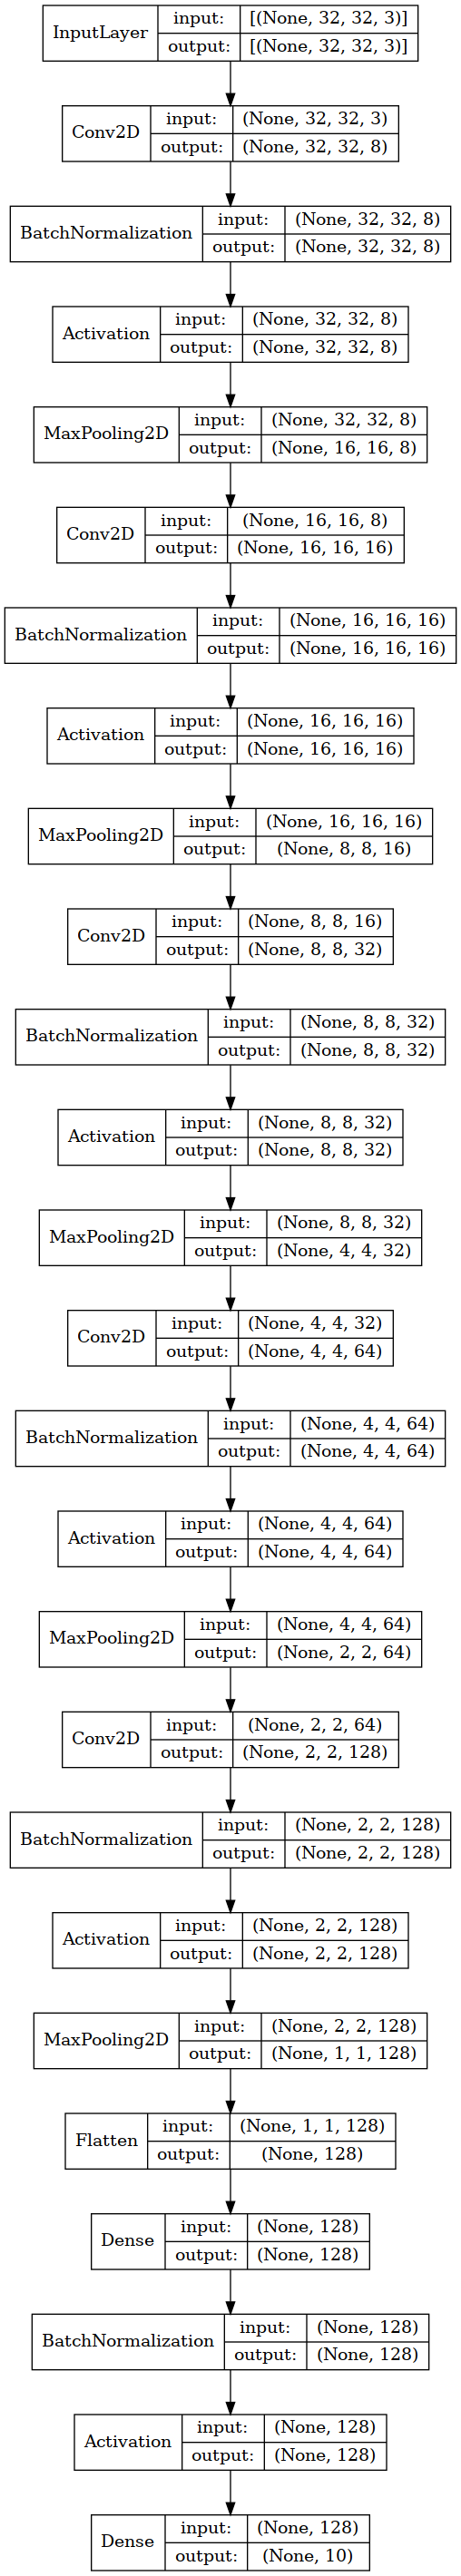

In [17]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

momentum = 0.75

x = Conv2D(8, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [18]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 15s 8ms/step - loss: 1.5995 - accuracy: 0.4193 - val_loss: 1.1547 - val_accuracy: 0.5837
Epoch 2/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0804 - accuracy: 0.6168 - val_loss: 1.0943 - val_accuracy: 0.6051
Epoch 3/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9448 - accuracy: 0.6697 - val_loss: 0.9300 - val_accuracy: 0.6682
Epoch 4/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8523 - accuracy: 0.7018 - val_loss: 0.9111 - val_accuracy: 0.6864
Epoch 5/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7895 - accuracy: 0.7198 - val_loss: 0.9253 - val_accuracy: 0.6767
Epoch 6/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7327 - accuracy: 0.7435 - val_loss: 0.8520 - val_accuracy: 0.7019
Epoch 7/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7037 - accuracy: 0.7534 - val_loss: 0.8309 - val_accuracy

In [19]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.874
Test accuracy = 0.717


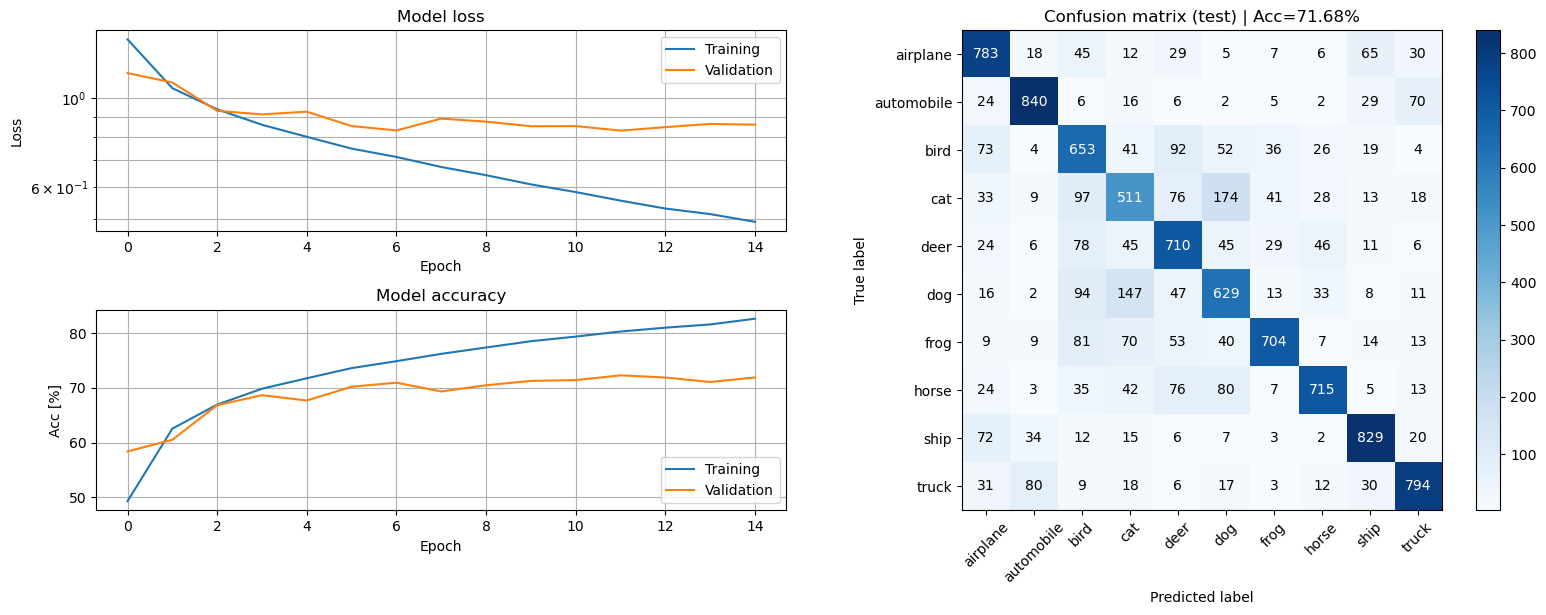

In [20]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**

1. If the minibatch size is too small, the mean and the variance of the features will not be representative of the whole dataset. In the extreme case of very small batch sizes (e.g. 1-10), this means that each batch will have their very own distribution which hinders the layer (and in turn the entire network) from learning generalized weights, since the weights will then be updated very differently for each batch.
2. High batch sizes demand far more compute than low batch sizes (e.g. for batch-size = N we are just using gradient descent instead of SGD). I don't know what the problem for batch normalization specifically could be.

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

In [21]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

momentum = 0.9
rate = 0.2

x = Conv2D(64, (3, 3), padding='same')(x_in)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Dropout(rate)(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization(momentum=momentum)(x)
x = Activation('relu')(x)
x = Dense(10, activation='softmax')(x)
# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
# plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_4"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_5 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_15 (Conv2D)                           (None, 32, 32, 64)                      1792           
____________________________________________________________________________________________________
batch_normalization_6 (BatchNormalization)   (None, 32, 32, 64)                      256            
____________________________________________________________________________________________________
activation_6 (Activation)                    (None, 32, 32, 64)                      0              
__________________________________________________________________________

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=64, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 23s 29ms/step - loss: 1.6292 - accuracy: 0.4142 - val_loss: 2.8639 - val_accuracy: 0.2357
Epoch 2/25
625/625 [==============================] - 16s 26ms/step - loss: 1.0825 - accuracy: 0.6131 - val_loss: 1.1379 - val_accuracy: 0.5985
Epoch 3/25
625/625 [==============================] - 16s 26ms/step - loss: 0.9066 - accuracy: 0.6781 - val_loss: 0.8785 - val_accuracy: 0.6914
Epoch 4/25
625/625 [==============================] - 16s 26ms/step - loss: 0.7890 - accuracy: 0.7191 - val_loss: 1.0552 - val_accuracy: 0.6451
Epoch 5/25
625/625 [==============================] - 16s 26ms/step - loss: 0.7228 - accuracy: 0.7453 - val_loss: 1.0947 - val_accuracy: 0.6368
Epoch 6/25
625/625 [==============================] - 16s 26ms/step - loss: 0.6605 - accuracy: 0.7686 - val_loss: 0.8265 - val_accuracy: 0.7141
Epoch 7/25
625/625 [==============================] - 16s 26ms/step - loss: 0.6219 - accuracy: 0.7812 - val_loss: 0.9210 - val_accuracy:

In [26]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.665
Test accuracy = 0.807


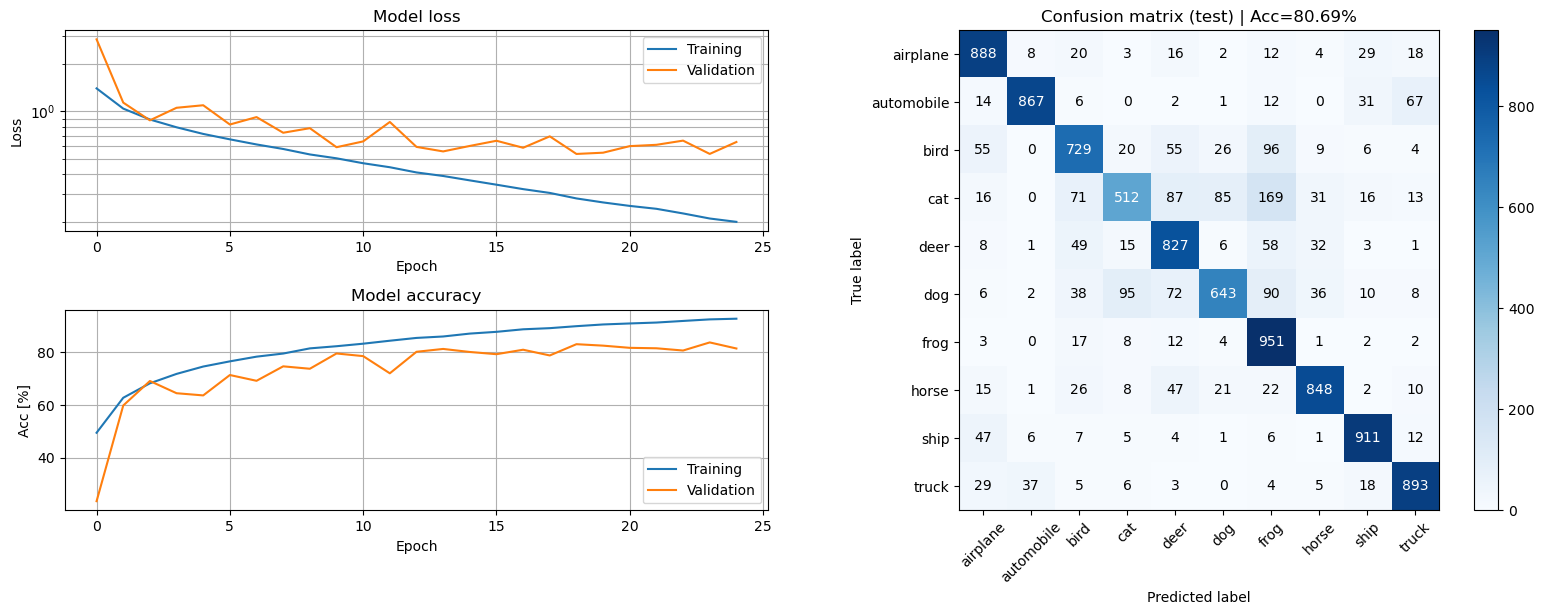

In [27]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**

#### Architecture
- The model uses 4 convolution-normalization-activation-pooling-dropout blocks the last of which goes into a 128 neuron dense layer which goes into a softmax activated 10 neuron dense layer to produce the prediction. 
- I saw that the batch normalization model worked very well, but overfit quite quickly. Therefore I introduced a dropout layer after every pooling layer.
- I chose to use 4 layers instead of 5 with more parameters, to make use of the additional epochs (more epochs -> can train more parameters).
- Since we have access to more epochs, I chose to also increase the momentum of the batch normalization to get more accurate scaling at test time.
- I increased the batch size to 64 from 32 to have more accurate batch normalization.

#### Results
- The model achieves a test performance of around 80% with the highest validation accuracy being 81/82%.
- The model still overfits with added dropout layers, but training time hindered me from testing more architectures.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


SyntaxError: invalid syntax (4245498712.py, line 7)

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)